In [1]:
import struct
import numpy as np
from sklearn import svm, metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

In [3]:
## loading mnist dataset

raw_train = read_idx("./data/train-images.idx3-ubyte")
train_data = np.reshape(raw_train, (60000, 28*28))
train_label = read_idx("./data/train-labels.idx1-ubyte")

raw_test = read_idx("./data/t10k-images.idx3-ubyte")
test_data = np.reshape(raw_test, (10000, 28*28))
test_label = read_idx("./data/t10k-labels.idx1-ubyte")

c:\anaconda3\envs\dm2019\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


In [4]:
## Standardizing the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(train_data)
train_std = sc.transform(train_data)
test_std = sc.transform(test_data)

In [5]:
## x = data, y = target

idx = (train_label == 0) |(train_label == 1) |(train_label == 2) |(train_label == 3) |(train_label == 4) | (train_label == 5) | (train_label == 6) | (train_label == 7) | (train_label == 8) | (train_label == 9)
X = train_std[idx] / 255.0
Y = train_label[idx]
svc = svm.SVC(C=1.0, kernel='linear', random_state=1).fit(X,Y)

In [6]:
idx = (test_label == 0) |(test_label == 1) |(test_label == 2) |(test_label == 3) |(test_label == 4) | (test_label == 5) | (test_label == 6) | (test_label == 7) | (test_label == 8) | (test_label == 9)
x_test = test_data[idx] / 255.0
y_true = test_label[idx]
y_pred = svc.predict(x_test)

In [7]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be appied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[968   0   1   0   0   0   3   0   8   0]
 [  0 918   5   8   0   0   5   0 199   0]
 [ 37   0 833  19   9   0  23   1 108   2]
 [ 13   0  15 858   1   2   6   3 110   2]
 [ 11   0   7   2 769   0  17   0  71 105]
 [ 96   2   7 144  10  89  20   0 509  15]
 [ 50   2   9   1   3   0 872   0  21   0]
 [ 26   3  37  12   9   0   2 762  91  86]
 [ 10   0   2   7   3   0   6   0 945   1]
 [ 24   1   9  11  13   0   0   2 102 847]]


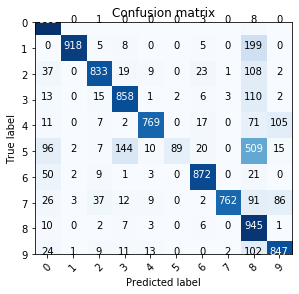

In [8]:
cm = metrics.confusion_matrix(y_true, y_pred) 

plot_confusion_matrix(cm, ["0","1","2","3","4","5","6","7","8","9"], normalize=False)